In [1]:
#Linear Regression - Algorithm

In [2]:
# X axis = columns of dataFrame (Independent atributes) 
#X = predictor of Y
# Y axis = predict variable (Dependent atribute)

In [3]:
# y = n (Slope) * x + c (Intercept)
# With more variabels X => Y = n1*x1 + n2*x2 + c

#Coefficient of relation - Pearson's coefficient p(x,y)
# Cov(x,y) / Stnd Dev(x) * Stnd Dev(Y)
#If Coef R =0 => No relation ; if > 0 => Relation ; if < 0 => Ralation

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression

car_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',
                    names=['symboling','normalized_losses','make','fuel_type','aspiration',
                          'num_of_doors','body_style','drive_wheels','engine_location',
                          'length','wheel_base','width','height','curb_weight','engine_type',
                          'num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
                          'horsepower','peak_rpm','city_mpg','highway_mpg','price'])

In [17]:
car_df.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
length,88.6,88.6,94.5,99.8,99.4


In [18]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
length               float64
wheel_base           float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [19]:
car_df = car_df.drop('make',axis=1)

In [20]:
car_df = car_df.drop('fuel_type',axis=1)
car_df = car_df.drop('engine_location',axis=1)
car_df = car_df.drop('num_of_doors',axis=1)
car_df = car_df.drop('body_style',axis=1)
car_df = car_df.drop('drive_wheels',axis=1)
car_df = car_df.drop('engine_type',axis=1)
car_df = car_df.drop('fuel_system',axis=1)
car_df = car_df.drop('aspiration',axis=1)
car_df = car_df.drop('normalized_losses',axis=1)

In [21]:
car_df.dtypes

symboling              int64
length               float64
wheel_base           float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [22]:
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one':1,'two':2,'three':3
                                                       ,'four':4,'five':5,'six':6,'seven':7,
                                                       'eight':8,'nine':9,'ten':10})

In [23]:
car_df = car_df.replace('?', np.nan)

car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df['peak_rpm'] = car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['price'] = car_df['price'].fillna(car_df['price'].median())

In [24]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
length,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
wheel_base,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [27]:
import seaborn as sns

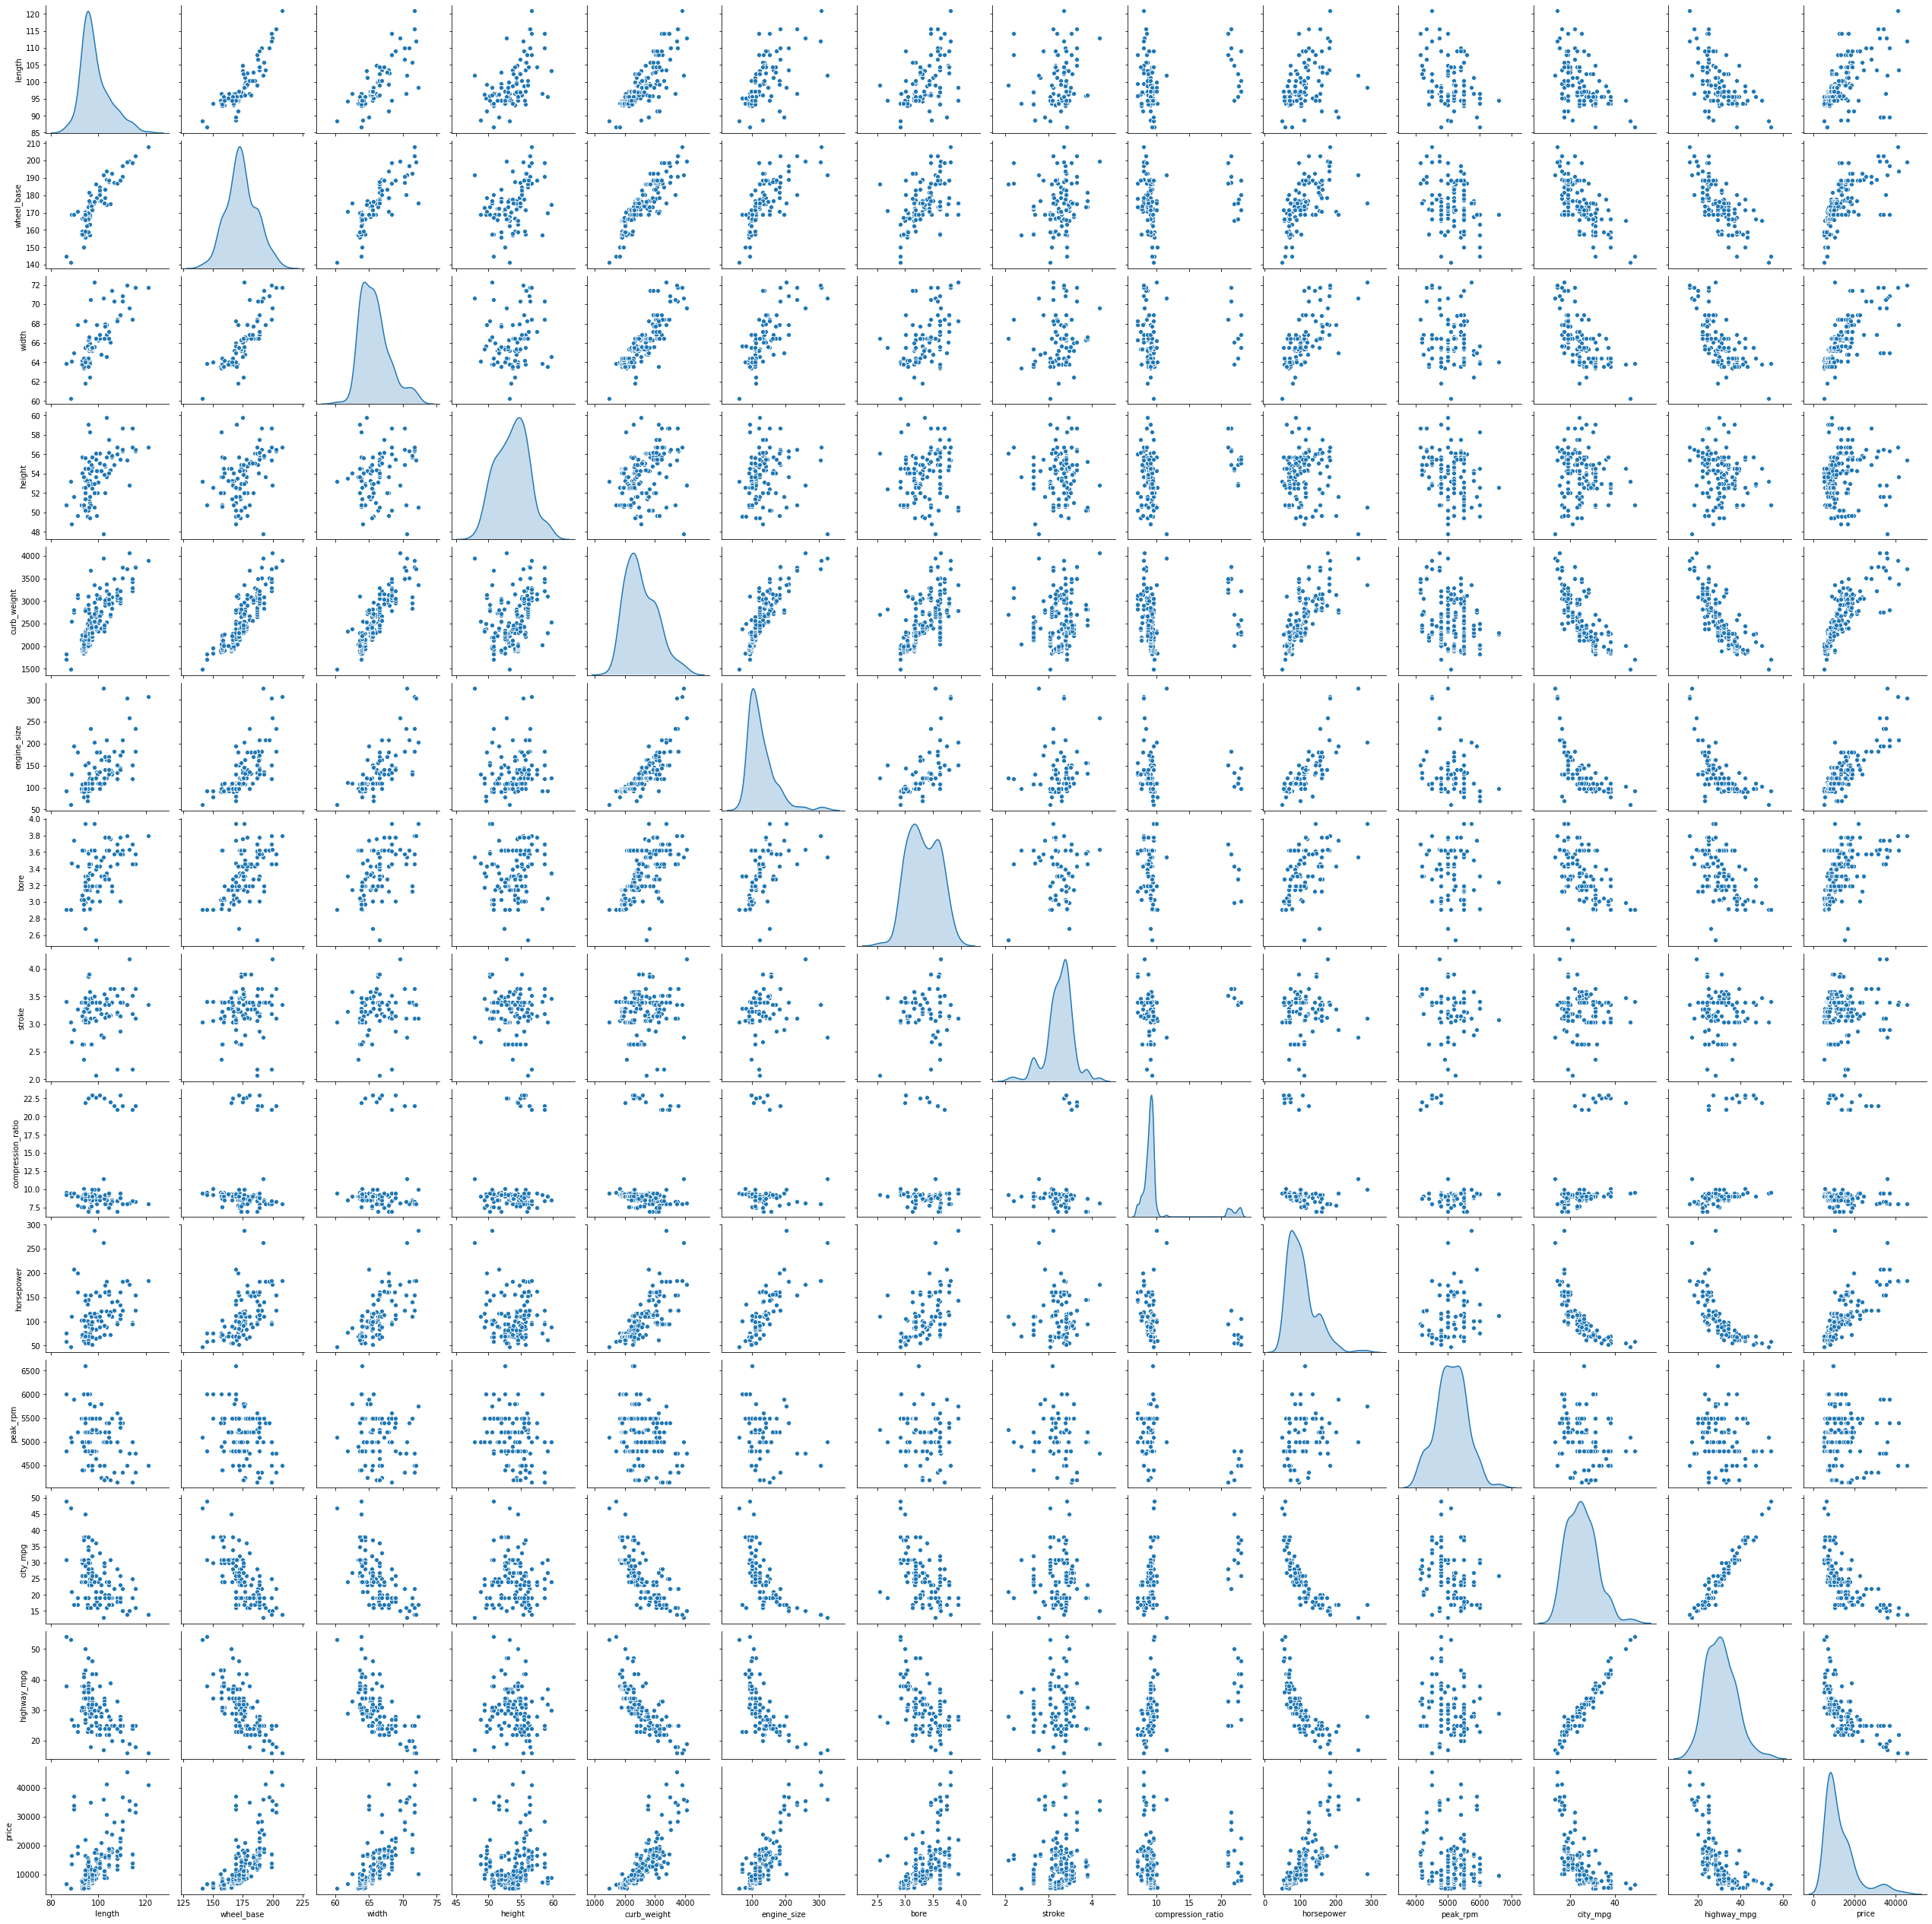

In [29]:
car_df_attr = car_df.iloc[:,1:16]

sns.pairplot(car_df_attr, diag_kind = 'kde')

In [70]:
X = car_df.drop('price',axis=1)
X= X.drop('num_of_cylinders',axis=1)

y = car_df[['price']]

In [71]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [86]:
regression_model = LinearRegression()
regression_model.fit(X_test, y_test)

for idx, col_name in enumerate(X_test.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for symboling is -373.74192448976277
The coefficient for length is -76.86316683201764
The coefficient for wheel_base is 141.82791906680382
The coefficient for width is 332.35590991472105
The coefficient for height is -121.26870031723935
The coefficient for curb_weight is 3.3748368150630887
The coefficient for engine_size is 254.8265856915683
The coefficient for bore is -14254.355071204747
The coefficient for stroke is -10492.385957202692
The coefficient for compression_ratio is 211.3865329234732
The coefficient for horsepower is 54.45480377702371
The coefficient for peak_rpm is 3.1838339438944736
The coefficient for city_mpg is 341.77296692783307
The coefficient for highway_mpg is -211.21065943116164
The coefficient for cylinder is -5740.993286175824
